In [1]:
from code.analyze import plot_simulate_tumor_growth

In [2]:
GENERATIONS = 100
K1, K2 = 0.74, 0.2
RHO = 3.8
TAU = 7

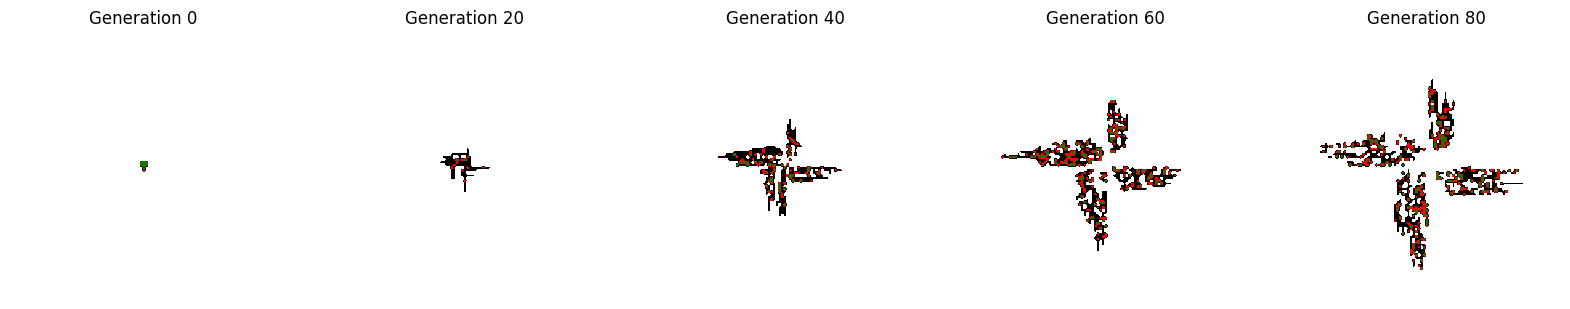

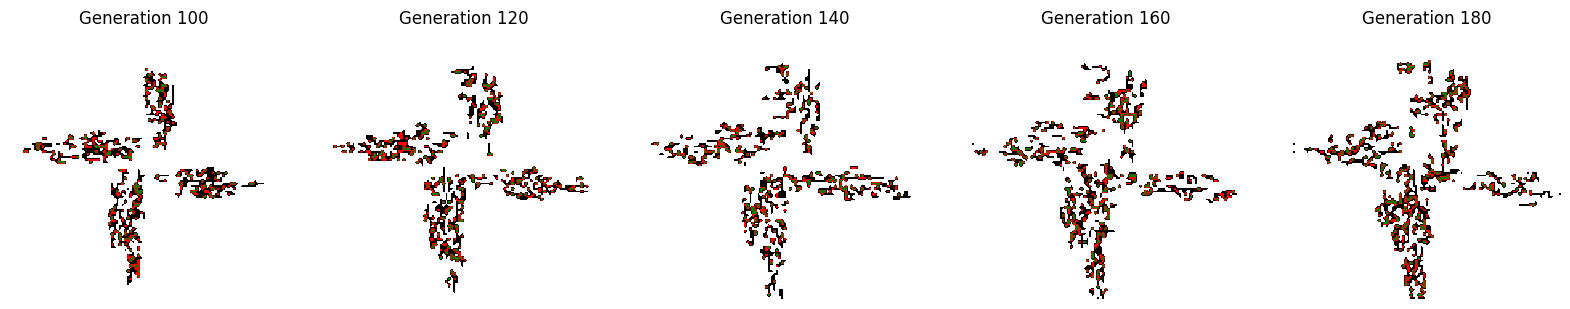

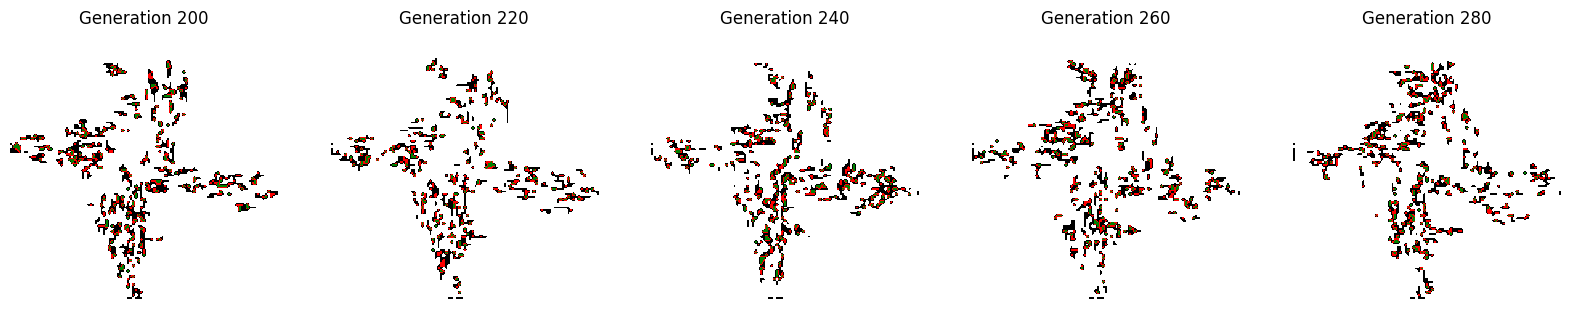

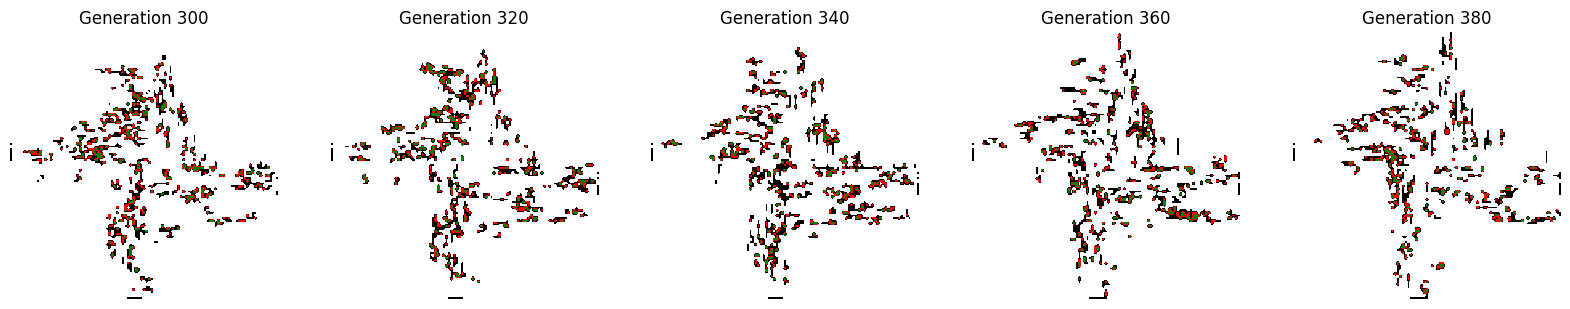

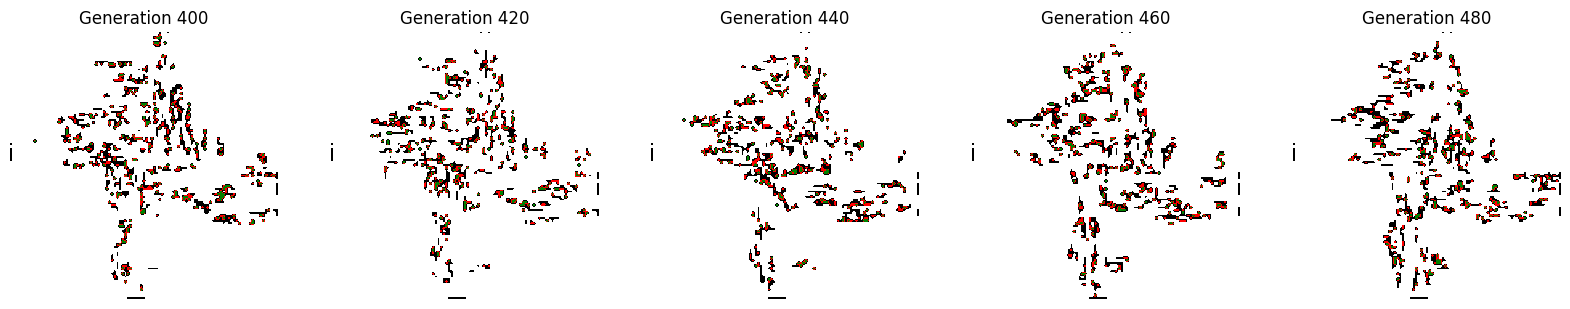

<Figure size 2000x800 with 0 Axes>

In [3]:
history = plot_simulate_tumor_growth(TAU, 500, K1, K2)